In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:

# Correctly load the dataset with the 'Sex' column read as strings
file_path = 'titanic_train.csv'  # Replace with your actual file path
titanic_data = pd.read_csv(file_path, dtype={'Sex': str})  # Ensuring 'Sex' is read as string

# Display the first few rows to confirm loading
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [140]:
# Convert the 'Sex' column to string type if needed (already done in read_csv)
titanic_data['Sex'] = titanic_data['Sex'].astype(str)

# Strip leading/trailing whitespace and handle any case differences
titanic_data['Sex'] = titanic_data['Sex'].str.strip().str.lower()

# Check unique values after cleaning
print("Unique values in 'Sex' column after cleaning:", titanic_data['Sex'].unique())




Unique values in 'Sex' column after cleaning: ['male' 'female']


In [141]:
# Check for missing values in the dataset
missing_values = titanic_data.isnull().sum()

# Get basic statistics for each column
basic_stats = titanic_data.describe(include='all')

missing_values, basic_stats

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
         PassengerId    Survived      Pclass                 Name   Sex  \
 count    891.000000  891.000000  891.000000                  891   891   
 unique          NaN         NaN         NaN                  891     2   
 top             NaN         NaN         NaN  Dooley, Mr. Patrick  male   
 freq            NaN         NaN         NaN                    1   577   
 mean     446.000000    0.383838    2.308642                  NaN   NaN   
 std      257.353842    0.486592    0.836071                  NaN   NaN   
 min        1.000000    0.000000    1.000000                  NaN   NaN   
 25%      223.500000    0.000000    2.000000                  NaN   NaN   
 50%      446.000000    0.000000    3.000000                  NaN   Na

In [142]:

# Check if the column 'Age' exists before filling missing values
if 'Age' in titanic_data.columns:
    titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].median())

# Check if the column 'Embarked' exists before filling missing values
if 'Embarked' in titanic_data.columns:
    titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])

# Check if the column 'Cabin' exists before filling missing values
if 'Cabin' in titanic_data.columns:
    titanic_data['Cabin'] = titanic_data['Cabin'].fillna('Unknown')

# Convert 'Sex' column to numeric if it exists
if 'Sex' in titanic_data.columns:
    titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Convert categorical variables 'Embarked' to dummy variables, only if the column exists
if 'Embarked' in titanic_data.columns:
    titanic_data = pd.get_dummies(titanic_data, columns=['Embarked'], drop_first=True)

# Check the updated dataset for any remaining missing values
updated_missing_values = titanic_data.isnull().sum()

print(updated_missing_values)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked_Q     0
Embarked_S     0
dtype: int64


In [153]:
# Check if 'Embarked' exists in the DataFrame
if 'Embarked' in titanic_data.columns:
    # Encode 'Embarked' column
    titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
else:
    print("The 'Embarked' column is missing from the DataFrame.")


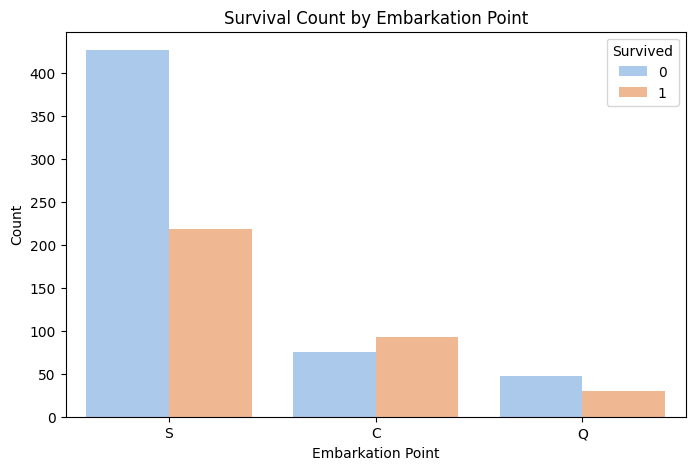

In [143]:
# Plot survival rate by embarkation points using dummy variables
plt.figure(figsize=(8, 5))

# Combine dummy variables into a single 'Embarked' category for plotting
titanic_data['Embarked'] = 'C'  # Default to Cherbourg (C)
titanic_data.loc[titanic_data['Embarked_S'] == True, 'Embarked'] = 'S'
titanic_data.loc[titanic_data['Embarked_Q'] == True, 'Embarked'] = 'Q'

# Plot the count of passengers who survived based on embarkation points
sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='pastel')
plt.title('Survival Count by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

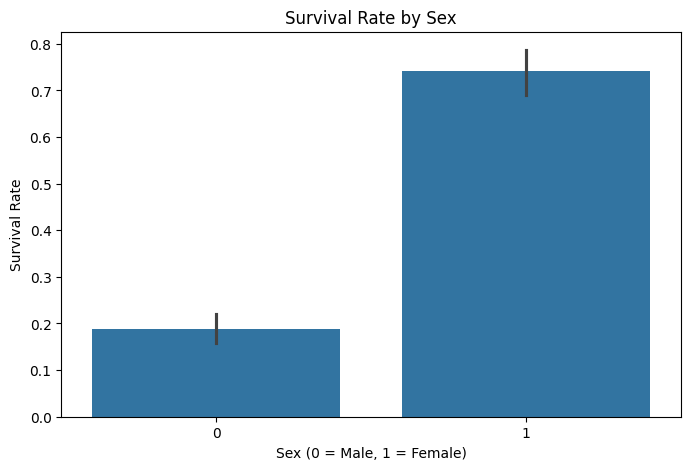

In [145]:
# Plot the survival rate by sex
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex (0 = Male, 1 = Female)')
plt.ylabel('Survival Rate')
plt.show()

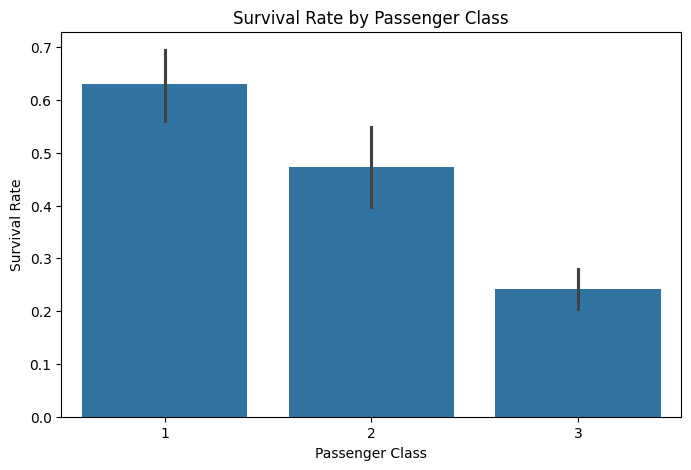

In [146]:
# Plot the survival rate by passenger class
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

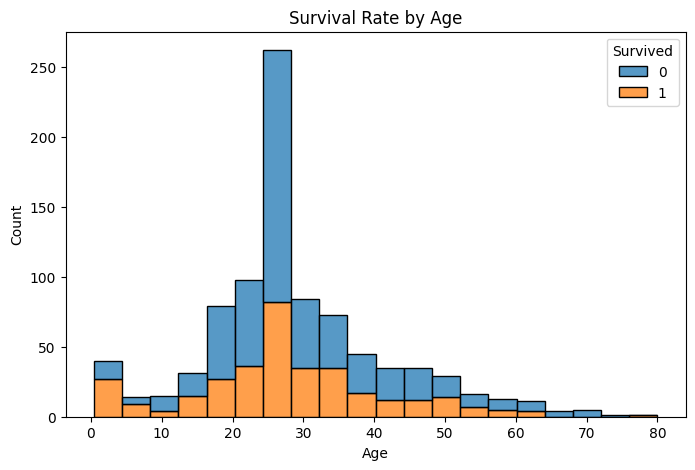

In [147]:
# Plot the survival rate by age group
plt.figure(figsize=(8, 5))
sns.histplot(data=titanic_data, x='Age', hue='Survived', multiple='stack', bins=20)
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

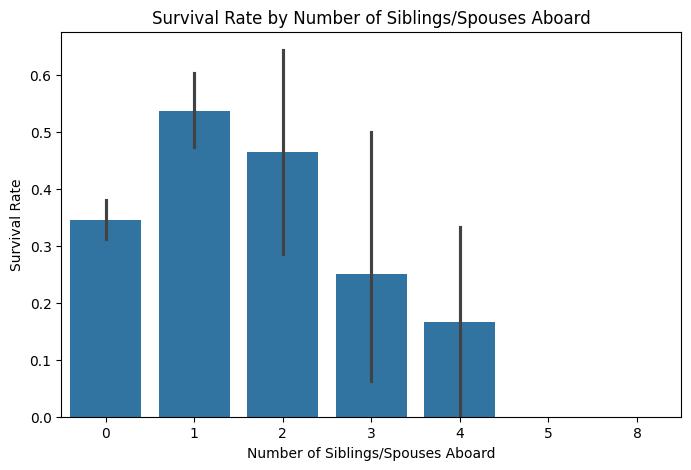

In [148]:
# Plot the survival rate by number of siblings/spouses aboard
plt.figure(figsize=(8, 5))
sns.barplot(x='SibSp', y='Survived', data=titanic_data)
plt.title('Survival Rate by Number of Siblings/Spouses Aboard')
plt.xlabel('Number of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

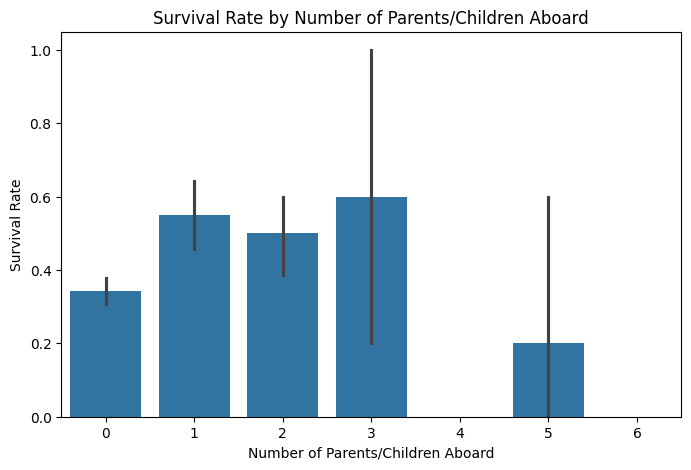

In [149]:
# Plot the survival rate by number of parents/children aboard
plt.figure(figsize=(8, 5))
sns.barplot(x='Parch', y='Survived', data=titanic_data)
plt.title('Survival Rate by Number of Parents/Children Aboard')
plt.xlabel('Number of Parents/Children Aboard')
plt.ylabel('Survival Rate')
plt.show()

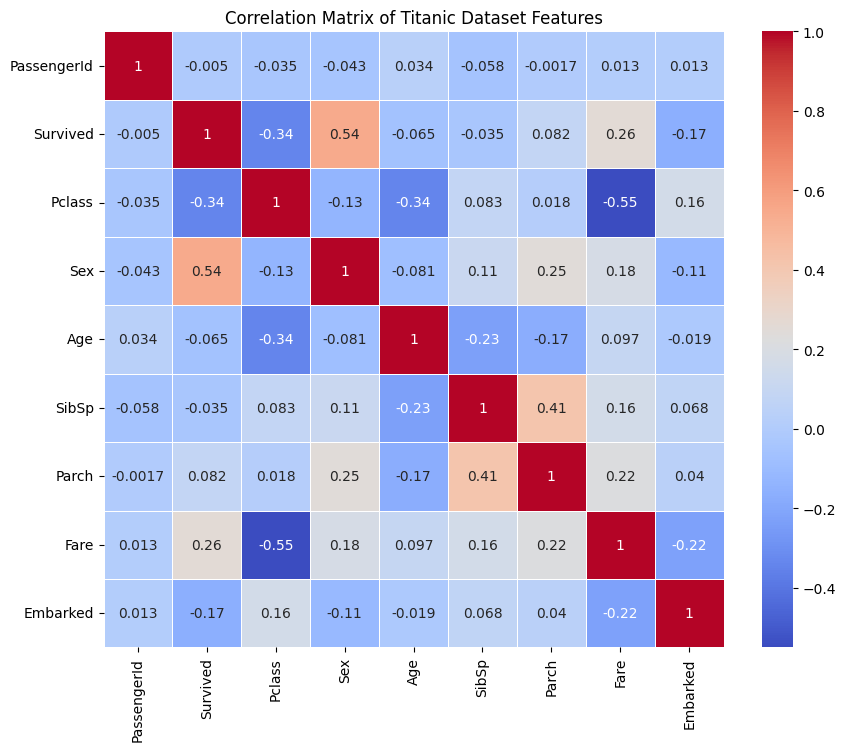

In [150]:
# Select only numeric columns for correlation calculation
numeric_data = titanic_data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset Features')
plt.show()


In [151]:
import pandas as pd

# Assuming your dataset is already loaded into titanic_data

# Calculate survival rate based on each potential rule

# Rule 1: Survival rate by Sex
survival_by_sex = titanic_data.groupby('Sex')['Survived'].mean()

# Rule 2: Survival rate by Passenger Class
survival_by_class = titanic_data.groupby('Pclass')['Survived'].mean()

# Rule 3: Survival rate by Age (for younger passengers)
survival_by_age_young = titanic_data[titanic_data['Age'] < 16]['Survived'].mean()
survival_by_age_old = titanic_data[titanic_data['Age'] >= 16]['Survived'].mean()

# Rule 4: Survival rate by number of siblings/spouses aboard
survival_by_sibsp = titanic_data.groupby('SibSp')['Survived'].mean()

# Rule 5: Survival rate by number of parents/children aboard
survival_by_parch = titanic_data.groupby('Parch')['Survived'].mean()

# Organizing the results in a more readable format

# Check the keys in the 'survival_by_sex' series
print("Keys in 'survival_by_sex':", survival_by_sex.keys())




Keys in 'survival_by_sex': Index([0, 1], dtype='int64', name='Sex')


In [152]:
# Convert results to a more readable format
readable_results = """
Survival Rates:
---------------
1. Survival by Sex:
   - Male (0): {:.2f}%
   - Female (1): {:.2f}%

2. Survival by Passenger Class:
   - 1st Class: {:.2f}%
   - 2nd Class: {:.2f}%
   - 3rd Class: {:.2f}%

3. Survival by Age:
   - Young (<16 years): {:.2f}%
   - Old (>=16 years): {:.2f}%

4. Survival by Number of Siblings/Spouses Aboard:
   - 0: {:.2f}%
   - 1: {:.2f}%
   - 2: {:.2f}%
   - 3: {:.2f}%
   - 4: {:.2f}%
   - 5: {:.2f}%
   - 8: {:.2f}%

5. Survival by Number of Parents/Children Aboard:
   - 0: {:.2f}%
   - 1: {:.2f}%
   - 2: {:.2f}%
   - 3: {:.2f}%
   - 4: {:.2f}%
   - 5: {:.2f}%
   - 6: {:.2f}%
""".format(
    survival_by_sex.get(0, 0) * 100, survival_by_sex.get(1, 0) * 100,
    survival_by_class.get(1, 0) * 100, survival_by_class.get(2, 0) * 100, survival_by_class.get(3, 0) * 100,
    survival_by_age_young * 100, survival_by_age_old * 100,
    survival_by_sibsp.get(0, 0) * 100, survival_by_sibsp.get(1, 0) * 100, survival_by_sibsp.get(2, 0) * 100, 
    survival_by_sibsp.get(3, 0) * 100, survival_by_sibsp.get(4, 0) * 100, survival_by_sibsp.get(5, 0) * 100, 
    survival_by_sibsp.get(8, 0) * 100,
    survival_by_parch.get(0, 0) * 100, survival_by_parch.get(1, 0) * 100, survival_by_parch.get(2, 0) * 100, 
    survival_by_parch.get(3, 0) * 100, survival_by_parch.get(4, 0) * 100, survival_by_parch.get(5, 0) * 100, 
    survival_by_parch.get(6, 0) * 100
)

print(readable_results)






Survival Rates:
---------------
1. Survival by Sex:
   - Male (0): 18.89%
   - Female (1): 74.20%

2. Survival by Passenger Class:
   - 1st Class: 62.96%
   - 2nd Class: 47.28%
   - 3rd Class: 24.24%

3. Survival by Age:
   - Young (<16 years): 59.04%
   - Old (>=16 years): 36.26%

4. Survival by Number of Siblings/Spouses Aboard:
   - 0: 34.54%
   - 1: 53.59%
   - 2: 46.43%
   - 3: 25.00%
   - 4: 16.67%
   - 5: 0.00%
   - 8: 0.00%

5. Survival by Number of Parents/Children Aboard:
   - 0: 34.37%
   - 1: 55.08%
   - 2: 50.00%
   - 3: 60.00%
   - 4: 0.00%
   - 5: 20.00%
   - 6: 0.00%

